In [1]:
import pandas

data = pandas.read_csv("./age_gender.csv")

In [2]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


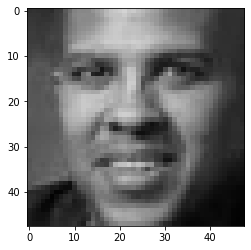

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import math

image = data['pixels'][15000].split(' ')
image = [int(x) for x in image]
image = np.array(image)

size = int(math.sqrt(len(data['pixels'][1].split(' '))))

image = np.resize(image, (size, size))

plt.imshow(image, cmap='gray', vmin=0, vmax=255)

In [9]:
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from PIL import Image
from tqdm import tqdm


def dumpImages(dataDF, path):
    os.system('rm -rf {}'.format(path))

    numberOfImages = dataDF.shape[0]
    size = int(math.sqrt(len(data['pixels'][0].split(' '))))
    os.mkdir(path)
    os.mkdir('{}/male'.format(path))
    os.mkdir('{}/female'.format(path))
    for i in tqdm(range(numberOfImages), desc='{} is dumping'.format(path)):
        image = data['pixels'][i].split(' ')
        image = [int(x) for x in image]
        image = np.array(image).astype(np.uint8)

        image = np.resize(image, (size, size))

        image = Image.fromarray(image)
        if data['gender'][i] == 0:
            image.save('{}/male/{}.jpeg'.format(path, i), 'JPEG')
        else:
            image.save('{}/female/{}.jpeg'.format(path, i), 'JPEG')

# dumpImages(data, './images')

In [10]:
from sklearn.model_selection import train_test_split

def splitTrainTestVal(data, trainSize, testSize, randomState):
    if trainSize + testSize >= 1.0:
        return None
    valSize = 1.0 - trainSize - testSize

    dataTrainIndex, dataTestValIndex = train_test_split(data.index, train_size=trainSize, random_state=randomState)
    dataTestIndex, dataValIndex = train_test_split(dataTestValIndex, train_size=testSize / (testSize + valSize), random_state=randomState)

    return data.iloc[dataTrainIndex], data.iloc[dataTestIndex], data.iloc[dataValIndex]

train, test, val = splitTrainTestVal(data, 0.70, 0.2, 42)

dumpImages(train, './train')
dumpImages(test, './test')
dumpImages(val, './val')

./val is dumping: 100%|██████████| 2371/2371 [00:01<00:00, 1616.11it/s]
